In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
import scipy
%matplotlib inline

In [55]:
df = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\Boston Bike Data.csv')
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.214190e+05,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000
mean,1.234644e+03,114.707311,42.358157,-71.088969,114.345028,42.357839,-71.087822,3020.227518,1984.443596,1.163426
std,1.853257e+04,91.828251,0.015366,0.024568,92.227295,0.122503,0.205472,902.348086,11.406707,0.521871
min,6.100000e+01,1.000000,42.167226,-71.166491,1.000000,0.000000,-71.166491,5.000000,1886.000000,0.000000
25%,3.650000e+02,51.000000,42.348810,-71.104412,49.000000,42.348953,-71.104412,2472.000000,1978.000000,1.000000
50%,5.910000e+02,87.000000,42.358100,-71.091156,84.000000,42.358100,-71.091156,3176.000000,1988.000000,1.000000
75%,9.790000e+02,177.000000,42.365994,-71.069849,177.000000,42.365908,-71.068922,3752.000000,1993.000000,1.000000
max,2.146146e+06,374.000000,42.406302,-70.905558,376.000000,42.406302,0.000000,4301.000000,2002.000000,2.000000


In [56]:
#Had to email Blue Bikes to ask if male = 1 or 2.
#Are riders disproportionally male or female?
gender = df['gender']
female = 0
male = 0
none = 0
for value in gender:
    if value == 1:
        male += 1
    elif value == 2:
        female += 1
    else:
        none += 1
print(female)
print(male)
print(none)


28077
85108
8234


In [57]:
total_riders = female + male + none
perc_female = (female /total_riders)
perc_male = (male/total_riders)
perc_none = (none/total_riders)
print (perc_female)
print (perc_male)
print (perc_none)

0.23124058013984633
0.700944662696942
0.06781475716321168


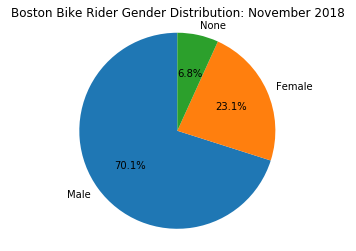

In [58]:
labels = 'Male', 'Female', 'None',
sizes = [perc_male, perc_female , perc_none]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Boston Bike Rider Gender Distribution: November 2018")

plt.show()

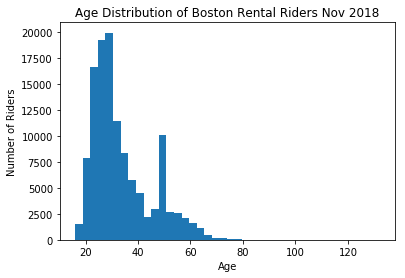

Maximum age is clearly an outlier: 132
Max age birth year: 1886
Minimum age: 16
Mean age: 33.55640385771584
Median age: 30.0


In [59]:
#What is the age distribution of bikers?
birth_year = df['birth year']
ages = 2018 - birth_year
plt.hist(ages, bins = 40)
plt.title('Age Distribution of Boston Rental Riders Nov 2018')
plt.xlabel('Age')
plt.ylabel('Number of Riders')
plt.show()
print ("Maximum age is clearly an outlier: {}".format(max(ages)))
print ("Max age birth year: {}".format(min(birth_year)))
print ("Minimum age: {}".format(min(ages)))
print ("Mean age: {}".format(ages.mean()))
print ("Median age: {}".format(ages.median()))


In [60]:
#Clearly there is an outlier. I don't believe someone from the 19th century is riding around Boston on a rental bike in 2018.
#Verified oldest person in America's birth year is 1905(113yrs old). Thank you Wikipedia.
#Let's get rid of outliers outside of 5 std to get rid of what is clearly a tech issue with 
#bike software/human registration error.

#Three standard deviations cuts off everyone older than 67. Let's be a bit more conservative
x1 = np.mean(ages) + 3*np.std(ages)
high_std = np.mean(ages) + 5*np.std(ages)
low_std = np.mean(ages) - 5*np.std(ages)

print (x1)
print (high_std)
print (low_std)


67.77638451864978
90.5897049592724
-23.47689724384071


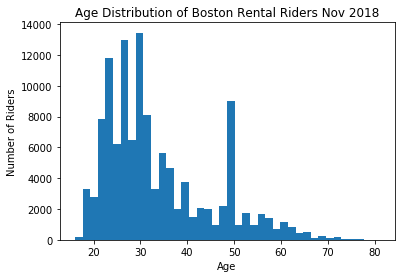

In [61]:
ages_adjusted = ages[ages < high_std]
#Ahhh, boolean indexing converts True/False to values
plt.hist(ages_adjusted, bins = 40)
plt.title('Age Distribution of Boston Rental Riders Nov 2018')
plt.xlabel('Age')
plt.ylabel('Number of Riders')
plt.show()


In [62]:
#What is the adjusted mean/median age of riders? Same!
print (np.mean(ages_adjusted))
print (np.median(ages_adjusted))

33.532301912905936
30.0


In [ ]:
#What are the most popular stations and can we imply anything about socioeconomics based on station use?

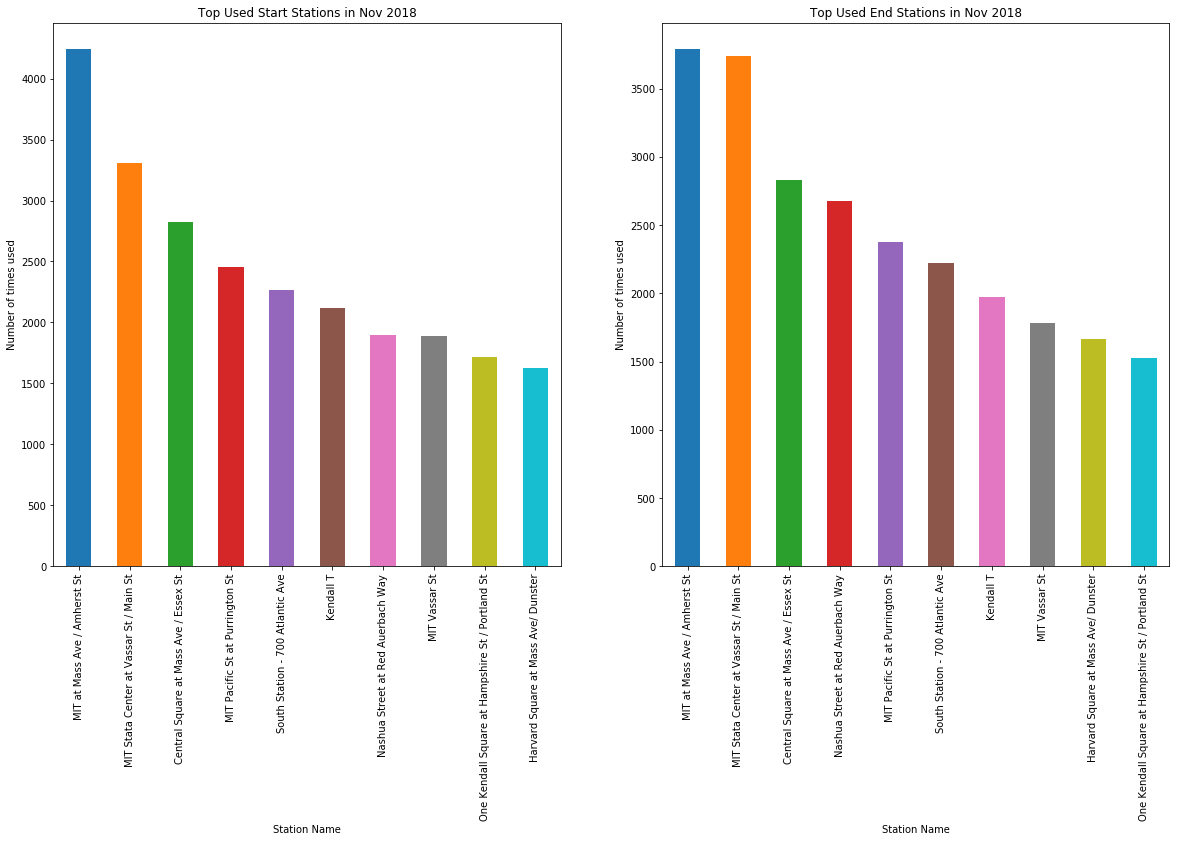

In [63]:
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.title('Top Used Start Stations in Nov 2018')
plt.xlabel('Station Name')
plt.ylabel('Number of times used')
df['start station name'].value_counts().head(10).plot(kind='bar')

plt.subplot(1,2,2)
plt.title('Top Used End Stations in Nov 2018')
plt.xlabel('Station Name')
plt.ylabel('Number of times used')
df['end station name'].value_counts().head(10).plot(kind='bar')



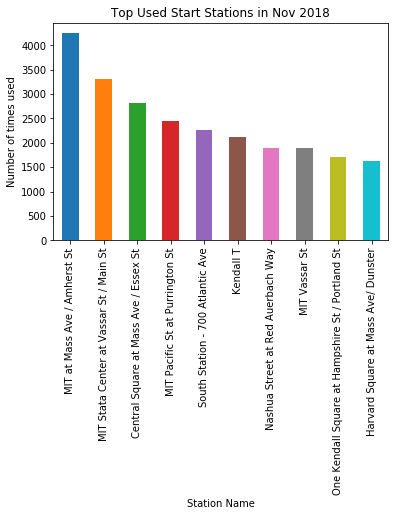

In [64]:
plt.title('Top Used Start Stations in Nov 2018')
plt.xlabel('Station Name')
plt.ylabel('Number of times used')
df['start station name'].value_counts().head(10).plot(kind='bar')


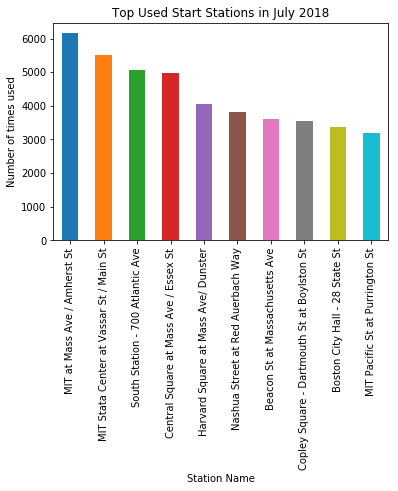

In [65]:
dfjul = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\Boston Bike Data July.csv')
plt.title('Top Used Start Stations in July 2018')
plt.xlabel('Station Name')
plt.ylabel('Number of times used')
dfjul['start station name'].value_counts().head(10).plot(kind='bar')
plt.show()


In [66]:
distances = []

from math import sin, cos, sqrt, atan2, radians


def dist_calc(start_station_lat, start_station_long, end_station_lat, end_station_long):
    R = 6373.0
    float(start_station_lat)
    float(start_station_long)
    float(end_station_long)
    float(end_station_lat)

    lat1 = radians(start_station_lat)
    lon1 = radians(start_station_long)
    lat2 = radians(end_station_lat)
    lon2 = radians(end_station_long)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
#convert km to mi
    distance_mi = (R * c)*0.621371
    distances.append(distance_mi)
    return distances




In [74]:

for i in df: 

    w = df.iloc[i,5]
    x = df.iloc[i,6]
    y = df.iloc[i,9]
    z = df.iloc[i,10]
    
    a= dist_calc(w, x, y, z)
    distances.append(a)
print (distances)

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [47]:
type(distances)

list

In [51]:
distances.sort()

TypeError: '<' not supported between instances of 'list' and 'float'